# `touchsim` tutorial
This notebook demonstrates some basic functionality of the `touchsim` package. For more on the in-built plotting options, see [touchsim_plotting.ipynb](./touchsim_plotting.ipynb). For a quick guide on overloaded functions see [touchsim_shortcuts.ipynb](./touchsim_shortcuts.ipynb).

In [1]:
import touchsim as ts # import touchsim package
from touchsim.plotting import plot # import in-built plotting function
import numpy as np
import matplotlib.pyplot as plt

## Hand regions and the coordinate system
`touchsim` includes a model of the hand surface. Its coordinate system is centered on the distal pad of the index finger. The first axis extends along the index finger towards the base and palm, while the second axis extends orthogonally towards the middle finger. Other spatial layouts can be used via the `Surface` class.

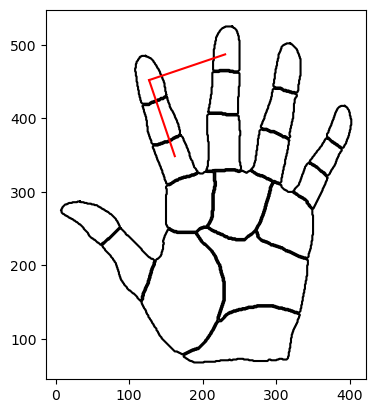

In [4]:
plot(coord=50)

## Generating individual afferents and populations
Single afferents belong to the `Afferent` class.

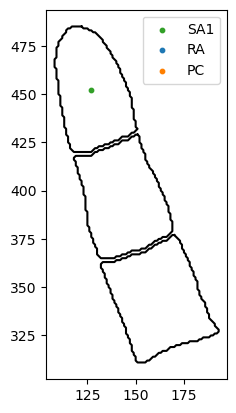

In [5]:
a1 = ts.Afferent('SA1',surface=ts.hand_surface) # generate SA1 afferent located at the origin

plot(region='D2')
plot(a1,size=10)

`Afferent` objects can be placed anywhere on the skin surface.

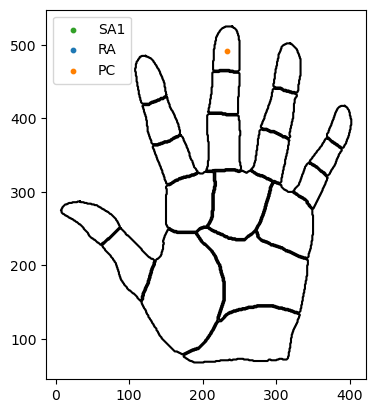

In [6]:
# generate PC afferent on distal pad of middle finger
a2 = ts.Afferent('PC',surface=ts.hand_surface,location=ts.hand_surface.centers[ts.hand_surface.tag2idx('D3d')])

ax = plot()
plot(a2,size=10,ax=ax)

Multiple `Afferent` objects combine into an `AfferentPopulation` object.

In [7]:
a = a1 + a2
print(a)

AfferentPopulation with 2 afferent(s): 1 SA1, 0 RA, 1 PC.


`touchsim` includes several `affpop_*` functions that generate commonly used `AfferentPopulation` objects. For example `affpop_grid` places afferents on a grid. `affpop_hand` places afferents on the hand model, in realistic densities. It can be limited to a specific hand region, afferent class, and the overall density can be adjusted.

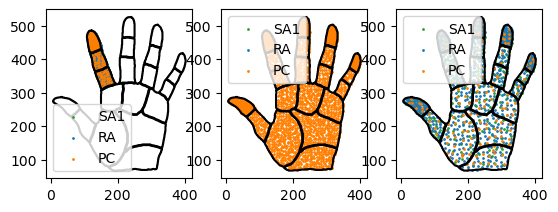

In [33]:
a_d2 = ts.affpop_hand(region='D2') # limit to digit 2
a_RA = ts.affpop_hand(affclass='PC') # limit to RA afferents
a = ts.affpop_hand(density_multiplier=0.1) # decrease density

_,(ax1,ax2,ax3) = plt.subplots(1,3)
plt.sca(ax1)
plot()
plot(a_d2)

plt.sca(ax2)
plot()
plot(a_RA)

plt.sca(ax3)
plot()
plot(a)

## Generating touch stimuli
Tactile stimuli are represented in `touchsim` using `Stimulus` objects. These consist of individual pins. Each pin is assigned a `location` on the skin surface and its movements orthogonal to the skin surface is described as a time-varying `trace` function.

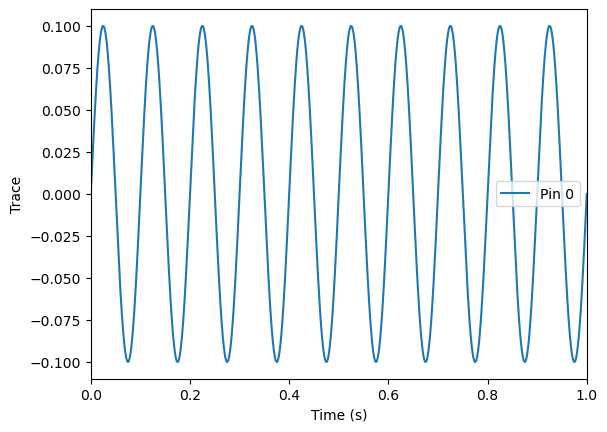

In [11]:
loc = np.zeros((1,2))
trace = 0.1 * np.sin(np.linspace(0.,2.*np.pi*10,5000))
s = ts.Stimulus(location = loc, trace = trace, fs=5000)

plot(s)

### Generating simple stimuli
A number of commonly used stimuli are implemented as `stim_*` functions. These include
* `stim_ramp` for ramp-hand-hold indentations
* `stim_sine` for sinusoidal vibrations
* `stim_noise` for bandpass white noise stimuli
* `stim_impulse` for brief "taps" of the skin

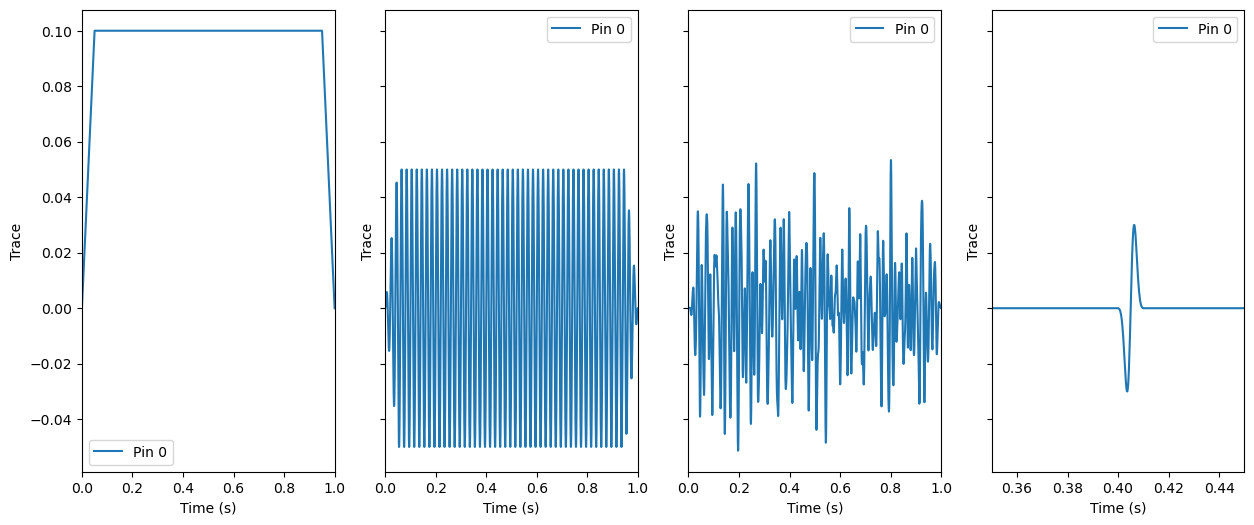

In [36]:
s_ramp = ts.stim_ramp(amp=0.1)
s_sine = ts.stim_sine(amp=0.05,freq=50)
s_noise = ts.stim_noise()
s_impulse = ts.stim_impulse(pad_len = 0.4)

_,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(15,6),sharey=True);
plt.sca(ax1) # set current axis to ax1
plot(s_ramp)
plt.sca(ax2)
plot(s_sine)
plt.sca(ax3)
plot(s_noise)
plt.sca(ax4)
plot(s_impulse,bin=[0.35, 0.45])

### Generating complex stimuli
Complex stimuli can be generated by combining an object shape, that is a specific spatial pin layout, with a movement trace that is applied to all pins simultaneously. The example below creates a large rounded probe, which is then indented into the skin using a ramp-and-hold pattern. The `stim_indent_shape` method is used to combine the spatial pin layout, here created using a `shape_*` function, with a movement trace, created using a `stim_*` function.

C:\Users\USER\Documents\GitHub\touchsim\touchsim\classes.py:315: UserWarning: Pin radius too big and has been adjusted to 0.2
  warnings.warn(


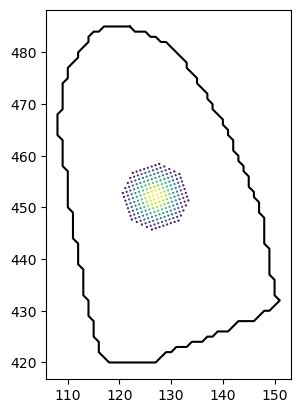

In [27]:
s = ts.stim_indent_shape(ts.shape_circle(hdiff=0.8,pins_per_mm=3,radius=3),ts.stim_ramp(len=0.1,pad_len=0.01))

plot(region='D2d')
plot(s,spatial=True)

## Calculating responses
The `response` method of `Afferent` and `AfferentPopulation` objects calculates the spiking response to any `Stimulus` object.

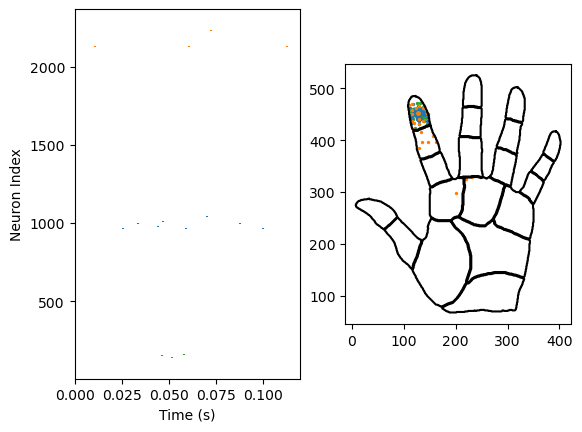

In [28]:
r = a.response(s) # calculate response of a to s.

# Plot response as raster plot and spatially on finger
_,(ax1,ax2) = plt.subplots(1,2);
plt.sca(ax1)
plot(r)
plt.sca(ax2)
plot()
plot(r,spatial=True)

## Getting help
Check the docstrings of functions and classes for additional help.

In [29]:
?ts.stim_ramp

Signature: ts.stim_ramp(**args)
Docstring:
Generates ramp up / hold / ramp down indentation.

Kwargs:
    amp (float): amplitude in mm (default: 1.).
    ramp_type (str): 'lin' or 'sin' (default: 'lin').
    len (float): total duration of stimulus in s (default: 1.).
    loc (array): stimulus location in mm (default: [0, 0]).
    fs (float): sampling frequency in Hz (default: 5000.).
    ramp_len (float): duration of on and off ramps in s (default 0.05).
    pin_radius (float): probe radius in mm (default: 0.5).
    pre_indent (float): static indentation throughout trial (default: 0.).
    pad_len (float): duration of stimulus zero-padding (default: 0.).

Returns:
    Stimulus object.
File:      c:\users\user\documents\github\touchsim\touchsim\generators.py
Type:      function

Objects can also print information about themselves.

In [32]:
print(a)

AfferentPopulation with 2453 afferent(s): 718 SA1, 1360 RA, 375 PC.


In [31]:
print(s)

Stimulus with 216 pins and 0.12 s total duration.


In [30]:
print(r)

Response consisting of:
* AfferentPopulation with 2453 afferent(s): 718 SA1, 1360 RA, 375 PC.
* 1 stimuli with 0.12 s total duration.
* 127 total spikes.
